In [1]:
!pip install pandasql


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'pandasql' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pandasql'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=9a4d8ef49e4e958a055c346034dba18f9cbdac0f2ed81e8f814eaa5362485677
  Stored in directory: /Users/quentingao/Library/Caches/pip/wheels/b4/d0/8c/a6b366870bf041849cd96e03b71641e082f8d6456269b603b7
Successfully built pandasql


In [2]:
import pandas as pd
import pandasql as psql

In [4]:
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
126307,547070,22151,PLACE SETTING WHITE HEART,6,3/20/2011 13:58,0.42,16115.0,United Kingdom
259132,559689,23120,PACK OF 6 SMALL FRUIT STRAWS,4,7/11/2011 15:46,0.42,NaN,United Kingdom
423779,573155,22650,CERAMIC PIRATE CHEST MONEY BANK,12,10/28/2011 8:34,1.45,13632.0,United Kingdom
25647,538378,22111,SCOTTIE DOG HOT WATER BOTTLE,3,12/12/2010 11:26,4.95,14577.0,United Kingdom
426416,573349,23201,JUMBO BAG ALPHABET,2,10/30/2011 12:28,2.08,17609.0,United Kingdom
340218,566612,23206,LUNCH BAG APPLE DESIGN,10,9/13/2011 17:16,1.65,16229.0,United Kingdom
16457,537666,22297,HEART IVORY TRELLIS SMALL,2,12/7/2010 18:36,2.51,NaN,United Kingdom
343313,566949,23349,ROLL WRAP VINTAGE CHRISTMAS,2,9/15/2011 16:32,2.46,NaN,United Kingdom
382241,569898,23110,PARISIENNE KEY CABINET,1,10/6/2011 16:08,12.46,NaN,United Kingdom
341693,566774,22942,CHRISTMAS LIGHTS 10 SANTAS,4,9/15/2011 9:44,8.50,12921.0,United Kingdom


**Calculate Transaction Revenue**

In this step, we create a new column `TotalPrice` in the dataframe, which represents the total revenue for each transaction line. It is calculated by multiplying the quantity of items purchased (`Quantity`) by the price per unit (`UnitPrice`). This new feature will be useful for sales aggregation and revenue analysis in the subsequent steps.


In [31]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


**Basic Dataset Overview**

Here, we use SQL queries to quickly summarize the main features of the UK Retail dataset:

- `total_rows`: The total number of transaction records in the dataset (**541,909** rows) 📦  
- `n_orders`: The number of unique orders/invoices (**25,900** orders) 🧾  
- `n_customers`: The number of unique customers (**4,372** customers) 🧑‍💼  
- `n_products`: The number of unique products sold (**4,070** products) 🛒  

This basic overview provides a snapshot of the dataset's size and diversity, setting the stage for deeper exploratory analysis.


In [32]:
print(psql.sqldf("SELECT COUNT(*) as total_rows FROM df", locals()))
print(psql.sqldf("SELECT COUNT(DISTINCT InvoiceNo) as n_orders FROM df", locals()))
print(psql.sqldf("SELECT COUNT(DISTINCT CustomerID) as n_customers FROM df", locals()))
print(psql.sqldf("SELECT COUNT(DISTINCT StockCode) as n_products FROM df", locals()))


   total_rows
0      541909
   n_orders
0     25900
   n_customers
0         4372
   n_products
0        4070


**Sales and Price Summary**

- 💰 **Total Sales**: The total revenue generated by all transactions is **9,747,747.93**.
- 🧾 **Average Order Value**: On average, each order is worth **£17.99**.

- 💵 **Average Product Price**: The mean unit price of products is **£4.61**.
- 📉 **Minimum Price**: The lowest unit price recorded is **-£11,062.06**.  
  ⚠️ This negative value likely indicates data entry errors or refunds.
- 📈 **Maximum Price**: The highest unit price is **£38,970.00**, which may also be an outlier.

These statistics give a quick sense of the scale and pricing dynamics in the dataset.  
It's also a good reminder to check for data quality issues—especially extreme or negative prices! 🚩


In [52]:
print(psql.sqldf("SELECT SUM(TotalPrice) as total_sales, AVG(TotalPrice) as avg_order_value FROM df", locals()))


   total_sales  avg_order_value
0  9747747.934        17.987795


In [34]:
print(psql.sqldf("SELECT AVG(UnitPrice) as avg_price, MIN(UnitPrice) as min_price, MAX(UnitPrice) as max_price FROM df", locals()))


   avg_price  min_price  max_price
0   4.611114  -11062.06    38970.0


**Top 10 Countries by Total Sales**

This query groups all transactions by country, then calculates:
- The number of unique orders (`order_count`) for each country.
- The total sales revenue (`total_sales`) contributed by each country.

The results are sorted in descending order of total sales, showing the top 10 countries:

| Country         | Orders   | Total Sales   |
|-----------------|----------|--------------|
| United Kingdom  | 23,494   | 8,187,806.36 |
| Netherlands     | 101      | 284,661.54   |
| EIRE            | 360      | 263,276.82   |
| Germany         | 603      | 221,698.21   |
| France          | 461      | 197,403.90   |
| Australia       | 69       | 137,077.27   |
| Switzerland     | 74       | 56,385.35    |
| Spain           | 105      | 54,774.58    |
| Belgium         | 119      | 40,910.96    |
| Sweden          | 46       | 36,595.91    |

- 🇬🇧 **United Kingdom** dominates both in number of orders and total sales, far ahead of any other country.
- Other top contributors include the Netherlands, EIRE (Ireland), Germany, and France.
- 🥇 This suggests that the UK is the primary market, with most sales activity and customers, while international sales are much smaller in scale.

Such a breakdown is helpful for identifying core markets and potential areas for international expansion! 🌍📊


In [35]:
query = """
SELECT Country, 
       COUNT(DISTINCT InvoiceNo) as order_count, 
       SUM(TotalPrice) as total_sales
FROM df
GROUP BY Country
ORDER BY total_sales DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


          Country  order_count  total_sales
0  United Kingdom        23494  8187806.364
1     Netherlands          101   284661.540
2            EIRE          360   263276.820
3         Germany          603   221698.210
4          France          461   197403.900
5       Australia           69   137077.270
6     Switzerland           74    56385.350
7           Spain          105    54774.580
8         Belgium          119    40910.960
9          Sweden           46    36595.910


### Monthly Sales Aggregation

In this step, I used SQL to group the transaction data by month and calculate the total sales for each month. Specifically, I extracted the year and month from the `InvoiceDate` field and summed up the `TotalPrice` for each group.

The results show substantial variation in monthly sales values, ranging from around 20,000 to nearly 70,000 in different months. This highlights clear fluctuations in sales volume throughout the observed period, which may reflect seasonal trends, demand cycles, or the impact of special promotions. Such monthly aggregation provides a solid foundation for identifying sales peaks and troughs, as well as for further time series analysis or visualization.


In [36]:
query = """
SELECT substr(InvoiceDate, 1, 7) as Month, SUM(TotalPrice) as monthly_sales
FROM df
GROUP BY Month
ORDER BY Month
"""
monthly_sales = psql.sqldf(query, locals())
print(monthly_sales)


       Month  monthly_sales
0    1/10/20       24191.64
1    1/11/20       67817.13
2    1/12/20       23958.78
3    1/13/20       20533.54
4    1/14/20       47377.26
..       ...            ...
293  9/5/201       36844.04
294  9/6/201       28052.62
295  9/7/201       34125.65
296  9/8/201       26708.00
297  9/9/201       29317.69

[298 rows x 2 columns]


### Visualization: Monthly Sales Trend

To visualize the aggregated sales data over time, I plotted the monthly total sales as a line chart. This visualization helps to quickly identify sales trends and fluctuations throughout the year.

The line plot reveals considerable month-to-month variability in sales volume, with several sharp peaks and troughs. These spikes may correspond to periods of high demand or special promotions, while dips may indicate slower sales seasons or potential data anomalies. Overall, the plot provides a clear overview of sales performance trends and serves as a starting point for further time series analysis or deeper investigation into specific sales drivers.


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

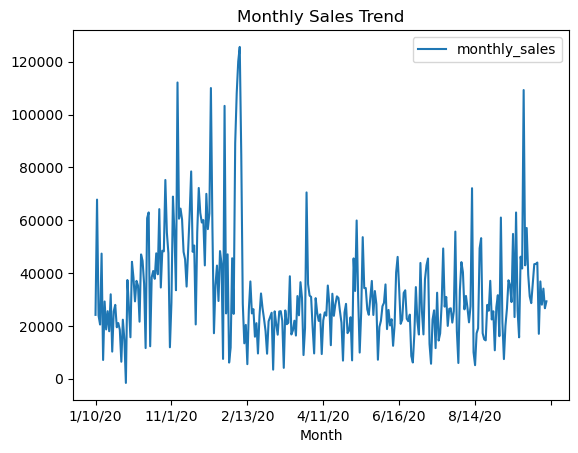

In [37]:
monthly_sales.plot(x='Month', y='monthly_sales', kind='line', title='Monthly Sales Trend')


### Top 10 Best-Selling Products

I queried the dataset to identify the top 10 best-selling products based on total quantity sold. By grouping the sales records by product description and summing the quantities for each, I was able to rank all products and extract the most popular items.

The results show that items such as "WORLD WAR 2 GLIDERS ASSTD DESIGNS," "JUMBO BAG RED RETROSPOT," and "ASSORTED COLOUR BIRD ORNAMENT" are among the most frequently sold products, each with tens of thousands of units sold. This summary highlights which products drive the largest sales volume and can inform further analysis on product trends or inventory management.


In [38]:
query = """
SELECT Description, SUM(Quantity) as total_sold
FROM df
GROUP BY Description
ORDER BY total_sold DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


                          Description  total_sold
0   WORLD WAR 2 GLIDERS ASSTD DESIGNS       53847
1             JUMBO BAG RED RETROSPOT       47363
2       ASSORTED COLOUR BIRD ORNAMENT       36381
3                      POPCORN HOLDER       36334
4     PACK OF 72 RETROSPOT CAKE CASES       36039
5  WHITE HANGING HEART T-LIGHT HOLDER       35317
6                  RABBIT NIGHT LIGHT       30680
7             MINI PAINT SET VINTAGE        26437
8          PACK OF 12 LONDON TISSUES        26315
9  PACK OF 60 PINK PAISLEY CAKE CASES       24753


### Top 10 Products by Total Sales Value

I analyzed the data to find which products generated the highest total sales revenue. By grouping transactions by product description and summing the total price for each product, I was able to rank the top 10 products in terms of sales value.

The analysis reveals that "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER" led the list with the highest total sales, followed by "WHITE HANGING HEART T-LIGHT HOLDER" and "PARTY BUNTING." This ranking shows which products contributed most to overall revenue, providing useful insights for revenue optimization and inventory strategy.


In [39]:
query = """
SELECT Description, SUM(TotalPrice) as total_sales
FROM df
GROUP BY Description
ORDER BY total_sales DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


                          Description  total_sales
0                      DOTCOM POSTAGE    206245.48
1            REGENCY CAKESTAND 3 TIER    164762.19
2  WHITE HANGING HEART T-LIGHT HOLDER     99668.47
3                       PARTY BUNTING     98302.98
4             JUMBO BAG RED RETROSPOT     92356.03
5                  RABBIT NIGHT LIGHT     66756.59
6                             POSTAGE     66230.64
7     PAPER CHAIN KIT 50'S CHRISTMAS      63791.94
8       ASSORTED COLOUR BIRD ORNAMENT     58959.73
9                       CHILLI LIGHTS     53768.06


### Top 10 Products by Total Sales Value

I analyzed the data to find which products generated the highest total sales revenue. By grouping transactions by product description and summing the total price for each product, I was able to rank the top 10 products in terms of sales value.

The analysis reveals that "DOTCOM POSTAGE" and "REGENCY CAKESTAND 3 TIER" led the list with the highest total sales, followed by "WHITE HANGING HEART T-LIGHT HOLDER" and "PARTY BUNTING." This ranking shows which products contributed most to overall revenue, providing useful insights for revenue optimization and inventory strategy.


In [40]:
query = """
SELECT CustomerID, COUNT(DISTINCT InvoiceNo) as order_count, SUM(TotalPrice) as total_spent
FROM df
GROUP BY CustomerID
ORDER BY order_count DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


   CustomerID  order_count  total_spent
0         NaN         3710   1447682.12
1     14911.0          248    132572.62
2     12748.0          224     29072.10
3     17841.0          169     40340.78
4     14606.0          128     11713.85
5     15311.0          118     59419.34
6     13089.0          118     57385.88
7     12971.0           89     10930.26
8     14527.0           86      7711.38
9     13408.0           81     27487.41


In [41]:
query = """
SELECT CustomerID, SUM(TotalPrice) as total_spent
FROM df
GROUP BY CustomerID
ORDER BY total_spent DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


   CustomerID  total_spent
0         NaN   1447682.12
1     14646.0    279489.02
2     18102.0    256438.49
3     17450.0    187482.17
4     14911.0    132572.62
5     12415.0    123725.45
6     14156.0    113384.14
7     17511.0     88125.38
8     16684.0     65892.08
9     13694.0     62653.10


In [42]:
query = """
SELECT COUNT(*) as n_returns, SUM(TotalPrice) as total_return
FROM df
WHERE InvoiceNo LIKE 'C%'
"""
print(psql.sqldf(query, locals()))


   n_returns  total_return
0       9288    -896812.49


In [ ]:
query = """
SELECT Country, Description, total_qty FROM (
    SELECT Country, Description, SUM(Quantity) as total_qty,
           ROW_NUMBER() OVER (PARTITION BY Country ORDER BY SUM(Quantity) DESC) as rn
    FROM df
    GROUP BY Country, Description
)
WHERE rn = 1
"""
try:
    print(psql.sqldf(query, locals()))
except Exception as e:
    print("pandasql does not support window functions (such as ROW_NUMBER). Please use sqlite3 for this exercise or implement it using pandas.")


                 Country                          Description  total_qty
0              Australia              MINI PAINT SET VINTAGE        2916
1                Austria     SET 12 KIDS COLOUR  CHALK STICKS        288
2                Bahrain           ICE CREAM SUNDAE LIP GLOSS         96
3                Belgium      PACK OF 72 RETROSPOT CAKE CASES        480
4                 Brazil            SMALL HEART FLOWERS HOOK          24
5                 Canada           RETRO COFFEE MUGS ASSORTED        504
6        Channel Islands                         RAIN PONCHO         407
7                 Cyprus       HEART DECORATION PAINTED ZINC         384
8         Czech Republic   WOODEN TREE CHRISTMAS SCANDINAVIAN         72
9                Denmark               RED  HARMONICA IN BOX         288
10                  EIRE      PACK OF 72 RETROSPOT CAKE CASES       1728
11    European Community     WHITE ROCKING HORSE HAND PAINTED         24
12               Finland      CHILDRENS CUTLERY POL

In [44]:
query = """
SELECT CustomerID, substr(InvoiceDate, 1, 7) as Month, SUM(TotalPrice) as monthly_spent
FROM df
GROUP BY CustomerID, Month
ORDER BY CustomerID, Month
"""
print(psql.sqldf(query, locals()))


       CustomerID    Month  monthly_spent
0             NaN  1/10/20        9207.24
1             NaN  1/11/20        8386.81
2             NaN  1/12/20        7527.09
3             NaN  1/13/20        5453.33
4             NaN  1/14/20        8044.88
...           ...      ...            ...
19513     18283.0  7/14/20         143.19
19514     18283.0  9/5/201         134.90
19515     18287.0  10/12/2        1001.32
19516     18287.0  10/28/2          70.68
19517     18287.0  5/22/20         765.28

[19518 rows x 3 columns]


In [45]:
query = """
SELECT Country, SUM(TotalPrice) as total_sales
FROM df
GROUP BY Country
HAVING total_sales > (SELECT AVG(total_sales) FROM (
    SELECT SUM(TotalPrice) as total_sales
    FROM df
    GROUP BY Country
))
ORDER BY total_sales DESC
"""
print(psql.sqldf(query, locals()))


          Country  total_sales
0  United Kingdom  8187806.364
1     Netherlands   284661.540
2            EIRE   263276.820


In [46]:
query = """
SELECT CustomerID, COUNT(DISTINCT InvoiceNo) as order_count, AVG(UnitPrice) as avg_price
FROM df
GROUP BY CustomerID
ORDER BY order_count DESC
LIMIT 10
"""
print(psql.sqldf(query, locals()))


   CustomerID  order_count  avg_price
0         NaN         3710   8.076577
1     14911.0          248   5.261843
2     12748.0          224   3.256269
3     17841.0          169   2.547060
4     14606.0          128   2.817764
5     15311.0          118   2.516158
6     13089.0          118   2.782149
7     12971.0           89   2.320942
8     14527.0           86   5.931395
9     13408.0           81   3.222555


In [ ]:
# return number for all 
returns = psql.sqldf("""
SELECT StockCode, COUNT(*) as n_returns
FROM df
WHERE InvoiceNo LIKE 'C%'
GROUP BY StockCode
""", locals())

# sales for all
sales = psql.sqldf("""
SELECT StockCode, COUNT(*) as n_sales
FROM df
GROUP BY StockCode
""", locals())

# merge
returns_df = returns.set_index('StockCode')
sales_df = sales.set_index('StockCode')
result = returns_df.join(sales_df, how='inner')
result['return_rate'] = result['n_returns'] / result['n_sales']
print(result.sort_values('return_rate', ascending=False).head(10))


           n_returns  n_sales  return_rate
StockCode                                 
85023C             1        1          1.0
35832              1        1          1.0
84839              1        1          1.0
85042              2        2          1.0
D                 77       77          1.0
CRUK              16       16          1.0
20957              1        1          1.0
85063              2        2          1.0
85065              1        1          1.0
79320              1        1          1.0


In [48]:
query = """
SELECT Month, COUNT(DISTINCT CustomerID) as new_customers
FROM (
    SELECT CustomerID, MIN(substr(InvoiceDate, 1, 7)) as Month
    FROM df
    GROUP BY CustomerID
)
GROUP BY Month
ORDER BY Month
"""
print(psql.sqldf(query, locals()))


       Month  new_customers
0    1/10/20             35
1    1/11/20             60
2    1/12/20             46
3    1/13/20             38
4    1/14/20             35
..       ...            ...
289  9/5/201              3
290  9/6/201              3
291  9/7/201              1
292  9/8/201              4
293  9/9/201              2

[294 rows x 2 columns]


In [ ]:
query = """
SELECT Month, CustomerID, order_count FROM (
    SELECT substr(InvoiceDate, 1, 7) as Month, CustomerID, COUNT(*) as order_count,
           ROW_NUMBER() OVER (PARTITION BY substr(InvoiceDate, 1, 7) ORDER BY COUNT(*) DESC) as rn
    FROM df
    GROUP BY Month, CustomerID
)
WHERE rn = 1
"""
try:
    print(psql.sqldf(query, locals()))
except Exception as e:
    print("pandasql does not support window functions (such as ROW_NUMBER). Please use sqlite3 for this exercise or implement it using pandas.")


       Month  CustomerID  order_count
0    1/10/20         NaN         1177
1    1/11/20         NaN          565
2    1/12/20         NaN          884
3    1/13/20         NaN          708
4    1/14/20         NaN          693
..       ...         ...          ...
293  9/5/201         NaN          196
294  9/6/201     17841.0          140
295  9/7/201         NaN         1100
296  9/8/201         NaN          356
297  9/9/201         NaN          286

[298 rows x 3 columns]


In [ ]:
# intervals for prices.
bins = [0, 5, 10, 20, 50, 100, 500, 10000]
labels = ['0-5','5-10','10-20','20-50','50-100','100-500','500+']
df['PriceBin'] = pd.cut(df['UnitPrice'], bins=bins, labels=labels, right=False)

query = """
SELECT PriceBin, COUNT(*) as n_items, AVG(Quantity) as avg_quantity
FROM df
GROUP BY PriceBin
ORDER BY n_items DESC
"""
print(psql.sqldf(query, locals()))


  PriceBin  n_items  avg_quantity
0      0-5   453898     10.823846
1     5-10    62971      3.240698
2    10-20    20863      2.565019
3    20-50     2758      1.793691
4  100-500      782      0.757033
5   50-100      380      0.784211
6     500+      245      0.453061
7     None       12     -0.333333
